In [43]:
from scipy.io import wavfile
import json
import numpy as np
from matplotlib import pyplot as plt
from extract_fundamental_freq import extract_fundamental_freq
import os
from scipy.fftpack import fft

In [44]:
def calc_mean(x):
    import numpy as np
    data = []
    for i in x:
        if i > 0.0:
            data.append(i)
    return np.mean(data)

In [45]:
init_path = 'timbre_wav_files/'
f_names = os.listdir(init_path)
harmonics = {}
for instrument_file_name in f_names:
    signal = basic.SignalObj(init_path + instrument_file_name)
    data = signal.data
    fs = signal.fs
    if len(data.shape) > 1:
        data = data[:, 0]
    n_samples = 8192
    spectrum_sample_width = n_samples // 2
    freq_ratio = fs / spectrum_sample_width
    data = data[:n_samples]
    #extracting_fundamental
    pitch = pYAAPT.yaapt(signal, f0_min = 50, f_max = 1000)
    
    fundamental_freq = calc_mean(pitch.samp_values)
    data_fft = fft(data)
    fft_data_halved = np.array(data_fft[:len(data_fft) // 2])
    amplitude_spectrum = np.abs(fft_data_halved)
    phase_spectrum = np.angle(fft_data_halved)
    
    fundamental_idx = int(fundamental_freq // freq_ratio)
    harmonics_nums = np.arange(1, 41)
    harmonic_idxs = harmonics_nums * fundamental_idx
    
    harmonic_amplitudes = amplitude_spectrum[harmonic_idxs].toli
    #harmonic_phases = phase_spectrum[harmonic_idxs]
    
    #harmonic_coefficients = np.concatenate((
       # harmonic_amplitudes, harmonic_phases), axis = ).tolist()
    
    instrument_name = instrument_file_name.replace('.wav', '')
    harmonics[instrument_name] = harmonic_amplitudes
    
    

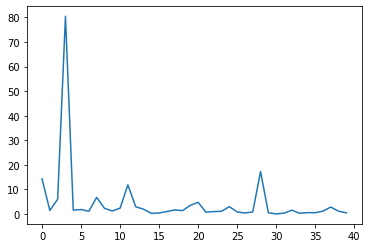

In [46]:
plt.plot(harmonics['piano'])

In [47]:
print(harmonics['saxophone'])

[  5.1629953  31.985737    1.2748213  16.054232    4.220131    3.725991
   2.813807    5.7232137   3.0557296   8.458656   17.520376    9.170161
  26.441402    8.8061905 115.12836     0.9637422  12.792871    3.4263406
  17.63024     6.3176584  21.507648    6.804728   16.561792    3.5036824
   3.9499662  12.569545    8.4029045  14.347621    2.1886568   1.5967907
   2.7760422  25.728308    1.9036332  15.453166    3.9356794  12.198006
   6.4521594   3.8971298   1.6789713   3.750163 ]


In [48]:
with open('harmonics.json', 'w') as fp:
    json.dump(harmonics, fp)

TypeError: Object of type 'ndarray' is not JSON serializable

In [7]:
import amfm_decompy.basic_tools as basic
import amfm_decompy.pYAAPT as pYAAPT

signal = basic.SignalObj('timbre_wav_files/piano.wav')
pitch = pYAAPT.yaapt(signal, f0_min = 50, f_max = 1000)

print(pitch.samp_values)

freq = calc_mean(pitch.samp_values)
print(freq)

[224.30419922 260.94674556 260.94674556 260.94674556 260.94674556
 260.94674556 260.94674556 260.94674556 260.94674556 260.94674556
 260.94674556 260.94674556 260.94674556 260.94674556 260.94674556
 260.94674556 260.94674556 260.94674556 260.94674556 260.94674556
 260.94674556 260.94674556 260.94674556 260.94674556 260.94674556
 260.94674556 260.94674556]
259.589614216079


44100.0


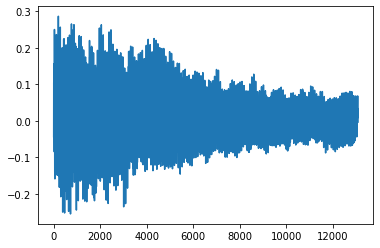

In [9]:
plt.plot(signal.data)
print(signal.fs)